<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Wrangling Lab**


Estimated time needed: **45** minutes


In this lab, you will perform data wrangling tasks to prepare raw data for analysis. Data wrangling involves cleaning, transforming, and organizing data into a structured format suitable for analysis. This lab focuses on tasks like identifying inconsistencies, encoding categorical variables, and feature transformation.


## Objectives


After completing this lab, you will be able to:


- Identify and remove inconsistent data entries.

- Encode categorical variables for analysis.

- Handle missing values using multiple imputation strategies.

- Apply feature scaling and transformation techniques.


#### Intsall the required libraries


In [1]:
!pip install pandas
!pip install matplotlib

## Tasks


#### Step 1: Import the necessary module.


### 1. Load the Dataset


<h5>1.1 Import necessary libraries and load the dataset.</h5>


Ensure the dataset is loaded correctly by displaying the first few rows.


In [2]:
# Import necessary libraries
import pandas as pd

# Load the Stack Overflow survey data
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(dataset_url)

# Display the first few rows
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

#### 2. Explore the Dataset


<h5>2.1 Summarize the dataset by displaying the column data types, counts, and missing values.</h5>


In [3]:
# Detailed info about the dataset
print("Dataset info:")
df.info()

# Summary statistics for numeric columns
print("\nSummary statistics for numeric columns:")
print(df.describe())

# Count missing values
missing_values = df.isnull().sum()
print("\nMissing values per column:")
print(missing_values)


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB

Summary statistics for numeric columns:
         ResponseId      CompTotal       WorkExp  JobSatPoints_1  \
count  65437.000000   3.374000e+04  29658.000000    29324.000000   
mean   32719.000000  2.963841e+145     11.466957       18.581094   
std    18890.179119  5.444117e+147      9.168709       25.966221   
min        1.000000   0.000000e+00      0.000000        0.000000   
25%    16360.000000   6.000000e+04      4.000000        0.000000   
50%    32719.000000   1.100000e+05      9.000000       10.000000   
75%    49078.000000   2.500000e+05     16.000000       22.000000   
max    65437.000000  1.000000e+150     50.000000      100.000000   

       JobSatPoints_4  JobSatPoints_5  JobSatPoints_6  JobSatPoints_7  \
count    29393.000000    29411.000000    29450.000000     29448.00000   
m

<h5>2.2 Generate basic statistics for numerical columns.</h5>


In [14]:
# Generate basic statistics for numerical columns
numeric_stats = df.describe()
print("Basic statistics for numerical columns:")
print(numeric_stats)


Basic statistics for numerical columns:
         ResponseId      CompTotal       WorkExp  JobSatPoints_1  \
count  65437.000000   3.374000e+04  29658.000000    29324.000000   
mean   32719.000000  2.963841e+145     11.466957       18.581094   
std    18890.179119  5.444117e+147      9.168709       25.966221   
min        1.000000   0.000000e+00      0.000000        0.000000   
25%    16360.000000   6.000000e+04      4.000000        0.000000   
50%    32719.000000   1.100000e+05      9.000000       10.000000   
75%    49078.000000   2.500000e+05     16.000000       22.000000   
max    65437.000000  1.000000e+150     50.000000      100.000000   

       JobSatPoints_4  JobSatPoints_5  JobSatPoints_6  JobSatPoints_7  \
count    29393.000000    29411.000000    29450.000000     29448.00000   
mean         7.522140       10.060857       24.343232        22.96522   
std         18.422661       21.833836       27.089360        27.01774   
min          0.000000        0.000000        0.000000  

### 3. Identifying and Removing Inconsistencies


<h5>3.1 Identify inconsistent or irrelevant entries in specific columns (e.g., Country).</h5>


In [15]:
# Check unique values in the 'Country' column
unique_countries = df['Country'].unique()
print(f"Unique entries in 'Country' column ({len(unique_countries)}):")
print(unique_countries)


Unique entries in 'Country' column (186):
['United States of America'
 'United Kingdom of Great Britain and Northern Ireland' 'Canada' 'Norway'
 'Uzbekistan' 'Serbia' 'Poland' 'Philippines' 'Bulgaria' 'Switzerland'
 'India' 'Germany' 'Ireland' 'Italy' 'Ukraine' 'Australia' 'Brazil'
 'Japan' 'Austria' 'Iran, Islamic Republic of...' 'France' 'Saudi Arabia'
 'Romania' 'Turkey' 'Nepal' 'Algeria' 'Sweden' 'Netherlands' 'Croatia'
 'Pakistan' 'Czech Republic' 'Republic of North Macedonia' 'Finland'
 'Slovakia' 'Russian Federation' 'Greece' 'Israel' 'Belgium' 'Mexico'
 'United Republic of Tanzania' 'Hungary' 'Argentina' 'Portugal'
 'Sri Lanka' 'Latvia' 'China' 'Singapore' 'Lebanon' 'Spain' 'South Africa'
 'Lithuania' 'Viet Nam' 'Dominican Republic' 'Indonesia' 'Kosovo'
 'Morocco' 'Taiwan' 'Georgia' 'San Marino' 'Tunisia' 'Bangladesh'
 'Nigeria' 'Liechtenstein' 'Denmark' 'Ecuador' 'Malaysia' 'Albania'
 'Azerbaijan' 'Chile' 'Ghana' 'Peru' 'Bolivia' 'Egypt' 'Luxembourg'
 'Montenegro' 'Cyprus' 'Pa

<h5>3.2 Standardize entries in columns like Country or EdLevel by mapping inconsistent values to a consistent format.</h5>


In [16]:
# Define a mapping for inconsistent country names
country_mapping = {
    'United States of America': 'USA',
    'United States': 'USA',
    'U.S.': 'USA',
    'India ': 'India',   # Remove trailing space
    'UK': 'United Kingdom',
    'U.K.': 'United Kingdom',
    'Other': 'Other/Prefer not to say'
}

# Apply mapping to the Country column
df['Country'] = df['Country'].replace(country_mapping)

# Verify changes
print(df['Country'].value_counts())


Country
USA                                                     11095
Germany                                                  4947
India                                                    4231
United Kingdom of Great Britain and Northern Ireland     3224
Ukraine                                                  2672
                                                        ...  
Micronesia, Federated States of...                          1
Nauru                                                       1
Chad                                                        1
Djibouti                                                    1
Solomon Islands                                             1
Name: count, Length: 185, dtype: int64


### 4. Encoding Categorical Variables


<h5>4.1 Encode the Employment column using one-hot encoding.</h5>


In [17]:
# Perform one-hot encoding
employment_encoded = pd.get_dummies(df['Employment'], prefix='Employment')

# Display the first few rows of the encoded columns
print(employment_encoded.head())

# Optionally, concatenate the new columns to the original dataframe
df = pd.concat([df, employment_encoded], axis=1)

# Verify the dataframe
print(df.head())


   Employment_Employed, full-time  \
0                            True   
1                            True   
2                            True   
3                           False   
4                           False   

   Employment_Employed, full-time;Employed, part-time  \
0                                              False    
1                                              False    
2                                              False    
3                                              False    
4                                              False    

   Employment_Employed, full-time;Independent contractor, freelancer, or self-employed  \
0                                              False                                     
1                                              False                                     
2                                              False                                     
3                                              False                      

### 5. Handling Missing Values


<h5>5.1 Identify columns with the highest number of missing values.</h5>


In [18]:
# Count missing values per column
missing_counts = df.isnull().sum()

# Sort columns by missing values in descending order
missing_counts_sorted = missing_counts.sort_values(ascending=False)

# Display columns with the most missing values
print("Columns with the highest number of missing values:")
print(missing_counts_sorted.head(10))  # Top 10 columns with most missing values


Columns with the highest number of missing values:
AINextMuch less integrated       64289
AINextLess integrated            63082
AINextNo change                  52939
AINextMuch more integrated       51999
EmbeddedAdmired                  48704
EmbeddedWantToWorkWith           47837
EmbeddedHaveWorkedWith           43223
ConvertedCompYearly              42002
AIToolNot interested in Using    41023
AINextMore integrated            41009
dtype: int64


<h5>5.2 Impute missing values in numerical columns (e.g., `ConvertedCompYearly`) with the mean or median.</h5>


In [19]:
# Calculate median
median_comp = df['ConvertedCompYearly'].median()

# Impute missing values
df['ConvertedCompYearly'] = df['ConvertedCompYearly'].fillna(median_comp)

# Verify no missing values remain
missing_after = df['ConvertedCompYearly'].isnull().sum()
print(f"Missing values in 'ConvertedCompYearly' after imputation: {missing_after}")


Missing values in 'ConvertedCompYearly' after imputation: 0


<h5>5.3 Impute missing values in categorical columns (e.g., `RemoteWork`) with the most frequent value.</h5>


In [20]:
# Find the most frequent value in RemoteWork
most_frequent_remote = df['RemoteWork'].mode()[0]
print(f"Most frequent value in 'RemoteWork': {most_frequent_remote}")
# Fill missing values with the most frequent value
df['RemoteWork'] = df['RemoteWork'].fillna(most_frequent_remote)

# Verify no missing values remain
missing_after = df['RemoteWork'].isnull().sum()
print(f"Missing values in 'RemoteWork' after imputation: {missing_after}")


Most frequent value in 'RemoteWork': Hybrid (some remote, some in-person)
Missing values in 'RemoteWork' after imputation: 0


### 6. Feature Scaling and Transformation


<h5>6.1 Apply Min-Max Scaling to normalize the `ConvertedCompYearly` column.</h5>


In [21]:
# Calculate min and max
min_comp = df['ConvertedCompYearly'].min()
max_comp = df['ConvertedCompYearly'].max()

# Apply Min-Max normalization
df['ConvertedCompYearly_MinMax'] = (df['ConvertedCompYearly'] - min_comp) / (max_comp - min_comp)

# Verify the result
print(df[['ConvertedCompYearly', 'ConvertedCompYearly_MinMax']].head())
print(f"Min of normalized column: {df['ConvertedCompYearly_MinMax'].min()}")
print(f"Max of normalized column: {df['ConvertedCompYearly_MinMax'].max()}")


   ConvertedCompYearly  ConvertedCompYearly_MinMax
0              65000.0                    0.003998
1              65000.0                    0.003998
2              65000.0                    0.003998
3              65000.0                    0.003998
4              65000.0                    0.003998
Min of normalized column: 0.0
Max of normalized column: 1.0


<h5>6.2 Log-transform the ConvertedCompYearly column to reduce skewness.</h5>


   ConvertedCompYearly  ConvertedCompYearly_Log
0              65000.0                11.082158
1              65000.0                11.082158
2              65000.0                11.082158
3              65000.0                11.082158
4              65000.0                11.082158


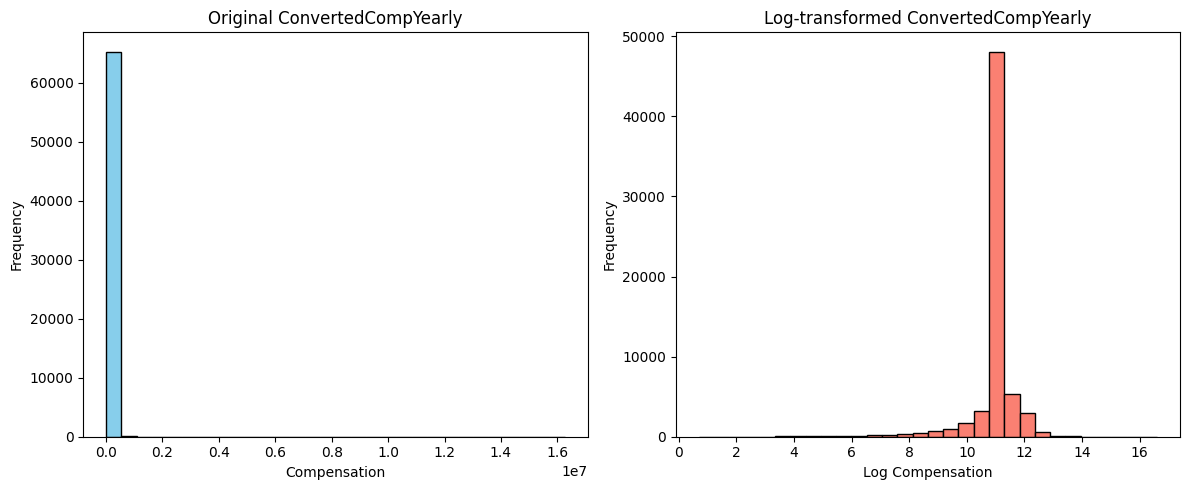

In [22]:
import numpy as np

# Apply log transformation
df['ConvertedCompYearly_Log'] = np.log1p(df['ConvertedCompYearly'])  # log1p handles zeros

# Check the transformed data
print(df[['ConvertedCompYearly', 'ConvertedCompYearly_Log']].head())

# Optional: visualize the effect
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Original distribution
plt.subplot(1,2,1)
plt.hist(df['ConvertedCompYearly'], bins=30, color='skyblue', edgecolor='black')
plt.title("Original ConvertedCompYearly")
plt.xlabel("Compensation")
plt.ylabel("Frequency")

# Log-transformed distribution
plt.subplot(1,2,2)
plt.hist(df['ConvertedCompYearly_Log'], bins=30, color='salmon', edgecolor='black')
plt.title("Log-transformed ConvertedCompYearly")
plt.xlabel("Log Compensation")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


### 7. Feature Engineering


<h5>7.1 Create a new column `ExperienceLevel` based on the `YearsCodePro` column:</h5>


In [24]:
import numpy as np

def convert_years(x):
    if pd.isnull(x):
        return np.nan
    elif x == "Less than 1 year":
        return 0.5
    elif x == "More than 50 years":
        return 51
    else:
        try:
            return float(x)
        except:
            return np.nan

# Apply conversion
df['YearsCodePro_Num'] = df['YearsCodePro'].apply(convert_years)

# Check the result
print(df[['YearsCodePro', 'YearsCodePro_Num']].head(10))
def categorize_experience(years):
    if pd.isnull(years):
        return "Unknown"
    elif years < 2:
        return "Junior"
    elif 2 <= years < 5:
        return "Intermediate"
    elif 5 <= years < 10:
        return "Mid-Level"
    else:
        return "Senior"

# Apply categorization
df['ExperienceLevel'] = df['YearsCodePro_Num'].apply(categorize_experience)

# Verify
print(df[['YearsCodePro_Num', 'ExperienceLevel']].head(10))
print("\nExperience level counts:")
print(df['ExperienceLevel'].value_counts())


  YearsCodePro  YearsCodePro_Num
0          NaN               NaN
1           17              17.0
2           27              27.0
3          NaN               NaN
4          NaN               NaN
5          NaN               NaN
6            7               7.0
7          NaN               NaN
8          NaN               NaN
9           11              11.0
   YearsCodePro_Num ExperienceLevel
0               NaN         Unknown
1              17.0          Senior
2              27.0          Senior
3               NaN         Unknown
4               NaN         Unknown
5               NaN         Unknown
6               7.0       Mid-Level
7               NaN         Unknown
8               NaN         Unknown
9              11.0          Senior

Experience level counts:
ExperienceLevel
Senior          21711
Unknown         13827
Mid-Level       12928
Intermediate    11476
Junior           5495
Name: count, dtype: int64


### Summary


In this lab, you:

- Explored the dataset to identify inconsistencies and missing values.

- Encoded categorical variables for analysis.

- Handled missing values using imputation techniques.

- Normalized and transformed numerical data to prepare it for analysis.

- Engineered a new feature to enhance data interpretation.


Copyright © IBM Corporation. All rights reserved.
